In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading all files
train_set = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True)
valid_set = pd.read_csv('gisette_valid.data', header=None, delim_whitespace=True)
test_set = pd.read_csv('gisette_test.data', header=None, delim_whitespace=True)
train_labels = pd.read_csv('gisette_train.labels', header=None, delim_whitespace=True)
valid_labels = pd.read_csv('gisette_valid.labels', header=None, delim_whitespace=True)

In [3]:
from sklearn.preprocessing import StandardScaler

# Normalizing data sets
train_set_normal = StandardScaler().fit_transform(train_set)
valid_set_normal = StandardScaler().fit_transform(valid_set)
test_set_normal = StandardScaler().fit_transform(test_set)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Performing PCA with 2 components for all sets
train_set_pca = pca.fit_transform(train_set_normal)
valid_set_pca = pca.transform(valid_set_normal)
test_set_pca = pca.transform(test_set_normal)
train_set_df = pd.DataFrame(data=train_set_pca, columns=['PC1', 'PC2'])
valid_set_df = pd.DataFrame(data=valid_set_pca, columns=['PC1', 'PC2'])
test_set_df = pd.DataFrame(data=test_set_pca, columns=['PC1', 'PC2'])
train_labels_df = pd.DataFrame(data=train_labels)
valid_labels_df = pd.DataFrame(data=valid_labels)

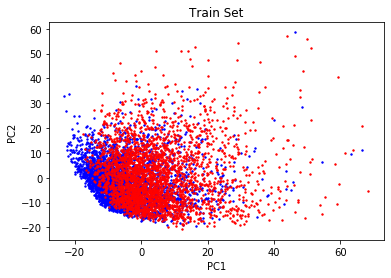

In [5]:
# Graphing train set data 2-components
plt.figure()
plt.title('Train Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = train_labels_df == target
    plt.scatter(train_set_df.loc[indicesToKeep[0], 'PC1'], train_set_df.loc[indicesToKeep[0], 'PC2'], c = color, s=2)

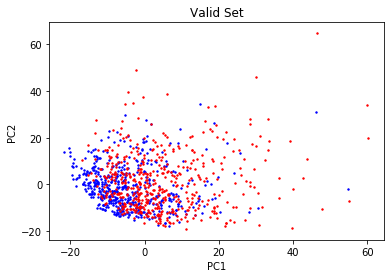

In [6]:
# Graphing valid set data 2-components
plt.figure()
plt.title('Valid Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = valid_labels_df == target
    plt.scatter(valid_set_df.loc[indicesToKeep[0], 'PC1'], valid_set_df.loc[indicesToKeep[0], 'PC2'], c = color, s=2)

Text(0.5, 0, 'Number of components')

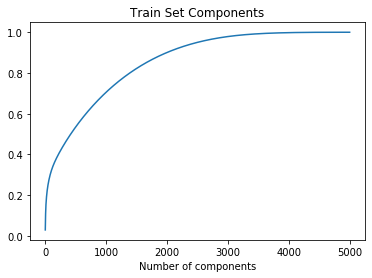

In [7]:
# Showing percentage of variance aggregated per component for train set
pca = PCA().fit(train_set_normal)
plt.title('Train Set Components')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')

Text(0.5, 0, 'Number of components')

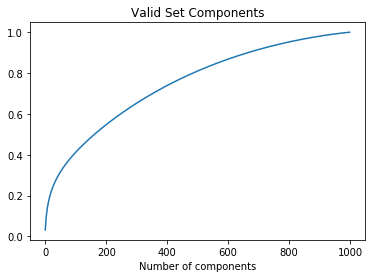

In [8]:
# Showing percentage of variance aggregated per component for valid set
pca = PCA().fit(valid_set_normal)
plt.title('Valid Set Components')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')